# <centre> EDA Project on  "The Titanic Wreck" <centre/>


<img src="https://raw.githubusercontent.com/insaid2018/Tableau/master/Data/titanic11.jpg"/>

## Table of Contents

1. [Objective](#section1)<br>
2. [Importing Packages and Collecting Data](#section2)
3. [Data Profiling & Preprocessing](#section3)
    - 3.1 [Pre Profiling](#section301)<br/>
    - 3.2 [Preprocessing](#section302)<br/>
    - 3.3 [Post Profiling](#section303)<br/>
4. [Analysis Through Data Visualization](#section4)
    - 4.1 [What is Total Count of Survivals and Victims?](#section401)<br/>
    - 4.2 [Which Gender has more Survival rate?](#section402)<br/>
    - 4.3 [What is Survival rate based on Person type(Male,female,Child)](#section403)<br/>
    - 4.4 [Did Economy Class had an impact on Survival?](#section404)<br/>
    - 4.5 [What is the Survival probaility based on Embarkment of Passengers?](#section405)<br/>
    - 4.6 [How is Fare distributed for the Passengers?](#section406)<br/>
    - 4.7 [What was Average Fare by Pclass & Embark location?](#section407)<br/>
    - 4.8 [ Segment Age in bins with size of 20.Also Correlate Age with Survival.](#section408)<br/>
    - 4.9 [ Did Solo Traveller has less chances of Survival?](#section409)<br/>
    - 4.10 [How did Total family size affected Survival Count?](#section410)<br/>
    - 4.11 [How can you correlate Pclass/Age/fare with Survival rate?](#section411)<br/>
    - 4.12 [Which features had most Impact on Survival rate? ](#section412)<br/>
5. [Conclusions](#section5)<br/>  

# Objective



The objective here is to conduct Exploratory data analysis **(EDA)** on the Titanic Dataset in order to gather insights and evenutally predicting survior on basics of factors like Class ,Sex , Age , Gender ,Pclass etc.

**Why EDA?**
   - An approach to summarize, visualize, and become intimately familiar with the important characteristics of a data set.
   - Defines and Refines the selection of feature variables that will be used for machine learning.
   - Helps to find hidden Insights
   - It provides the context needed to develop an appropriate model with minimum errors


**About Event**

The RMS Titanic was a British passenger liner that **sank** in the **North Atlantic Ocean** in the early morning hours of **15 April 1912**, after it collided with an iceberg during its maiden voyage from **Southampton** to **New York City**. There were an estimated **2,224** passengers and crew aboard the ship, and more than **1,500** died, making it one of the deadliest commercial peacetime maritime disasters in modern history.
This sensational tragedy shocked the international community and led to better safety regulations for ships.




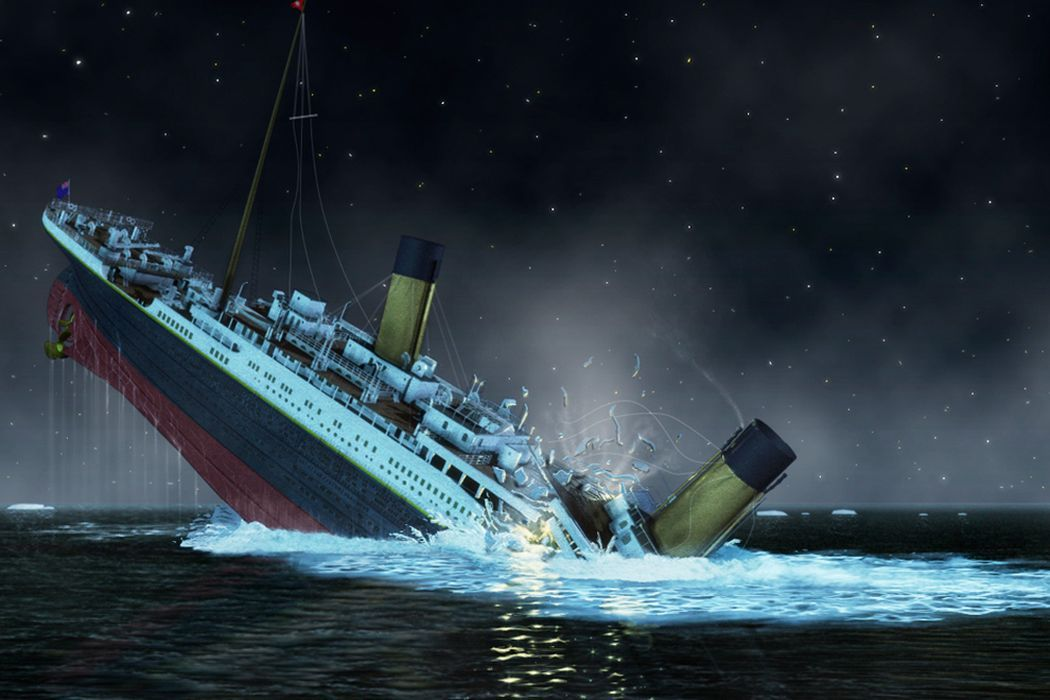

### 2. Data  Description

The dataset consists of the information about people boarding the famous RMS Titanic. Various variables present in the dataset includes data of age, sex, fare, ticket etc.
The dataset comprises of 891 observations of 12 columns. Below is a table showing names of all the columns and their description.


| Column Name  | Description                                                                 |
|--------------|------------------------------------------------------------------------------|
| PassengerId  | Passenger Identity                                                           |
| Survived     | Survival (0 = No; 1 = Yes)                                                   |
| Pclass       | Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)                                  |
| Name         | Name of passenger                                                            |
| Sex          | Sex of passenger                                                             |
| Age          | Age of passenger                                                             |
| SibSp        | Number of siblings and/or spouses travelling with passenger                  |
| Parch        | Number of parents and/or children travelling with passenger                  |
| Ticket       | Ticket number                                                                |
| Fare         | Price of ticket                                                              |
| Cabin        | Cabin number                                                                 |
| Embarkment   | Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)         |


## Import necessary modules 

In [1]:
import numpy as np               # For linear algebra
import pandas as pd              # For data manipulation
import matplotlib.pyplot as plt  # For 2D visualization
##import pandas_profiling # for installation: conda install -c conda-forge pandas-profiling
import seaborn as sns #Visualization
%matplotlib inline 
sns.set()
import warnings                                                                
warnings.filterwarnings('ignore') 
from matplotlib.pyplot import pie, axis, show #visualizations 

**Importing Data**

In [2]:
Titanic_data=pd.read_csv(r"https://raw.githubusercontent.com/suyashi29/python-su/master/ML/titanic.csv")

In [3]:
Titanic_data.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

In [4]:
Titanic_data.tail(1)

PassengerId  Survived  Pclass                 Name   Sex   Age  SibSp  \
890          891         0       3  Dooley, Mr. Patrick  male  32.0      0   

     Parch  Ticket  Fare Cabin Embarked  
890      0  370376  7.75   NaN        Q

# **Examining Data**

In [5]:
Titanic_data.shape #shows total number of rows and columns in data set

(891, 12)

In [6]:
Titanic_data.drop_duplicates(subset=None,keep="first",inplace=False)

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [7]:
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
Titanic_data['PassengerId'] = Titanic_data['PassengerId'].astype(str)
Titanic_data['Pclass'] = Titanic_data['Pclass'].astype(str)

1. Relevant features to check survival probability:
2. Age, Fare, 
(Person_type(Infant,Adults,Young, Old))

## Statistical Summary about Data

In [9]:
Titanic_data.describe()#(include='all') ## Outcome for Numerical Values only 

Survived         Age       SibSp       Parch        Fare
count  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838   29.699118    0.523008    0.381594   32.204208
std      0.486592   14.526497    1.102743    0.806057   49.693429
min      0.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000   80.000000    8.000000    6.000000  512.329200

In [10]:
Titanic_data.describe(include='object')  ## Outcome for Categorical Data 

PassengerId Pclass                     Name   Sex  Ticket    Cabin  \
count          891    891                      891   891     891      204   
unique         891      3                      891     2     681      147   
top              1      3  Braund, Mr. Owen Harris  male  347082  B96 B98   
freq             1    491                        1   577       7        4   

       Embarked  
count       889  
unique        3  
top           S  
freq        644


**Insights**:

1.Total samples are **891** or **40%** of the actual number of passengers on board the Titanic **(2,224)**

2.Survived is a categorical feature with 0 or 1 values

3.Around **38%** samples survived representative of the actual survival rate at **32%**

4.Fares varied significantly with few passengers (<1%) paying as high as $512.

5.Few elderly passengers (<1%) within age range **65-80**.

6.More number of Male passengers

7.More travellers were Embarked form S


In [11]:
x=np.array([1,2,3,4,5])
x.mean()
x.std()
x.var()
x.mean()

3.0

In [12]:
Titanic_data["Age"].mean()

29.69911764705882

# Data Preprocessing

1. Check for Errors and Null Values

2. Replace Null Values with appropriate values

3. Drop down features that are incomplete and are not too relevant for analysis

4. Create new features that can would help to improve prediction 

**Check for null or empty values in Data**

In [13]:
sum_null=Titanic_data.isnull().sum()
percentage_null= (Titanic_data.isnull().sum()/len(Titanic_data))*100
miss_data=pd.concat([sum_null,percentage_null],axis=1,keys=['Total','%'])
miss_data

Total          %
PassengerId      0   0.000000
Survived         0   0.000000
Pclass           0   0.000000
Name             0   0.000000
Sex              0   0.000000
Age            177  19.865320
SibSp            0   0.000000
Parch            0   0.000000
Ticket           0   0.000000
Fare             0   0.000000
Cabin          687  77.104377
Embarked         2   0.224467

The Age, Cabin and Embarked have null values.Lets fix them

**Filling missing age by median** ## Median is not affected by Outliers

In [14]:
new_age = Titanic_data.Age.median()  
Titanic_data.Age.fillna(new_age, inplace = True)
#Titanic_test.Age.fillna(new_age, inplace = True)

**Filling missing Embarked by mode**

In [15]:
Titanic_data.Embarked = Titanic_data.Embarked.fillna(Titanic_data['Embarked'].mode()[0])
#Titanic_test.Embarked = Titanic_test.Embarked.fillna(Titanic_data['Embarked'].mode()[0])

**Cabin feature may be dropped as it is highly incomplete or contains many null values**

In [16]:
Titanic_data.drop('Cabin', axis = 1,inplace = True)

**PassengerId  Feature may be dropped from training dataset as it does not contribute to survival**

In [17]:
Titanic_data.drop('PassengerId', axis = 1,inplace = True)

**Ticket feature may be dropped down**

In [18]:
Titanic_data.drop('Ticket', axis = 1,inplace = True)

In [19]:
miss1=Titanic_data.isnull().sum()
miss= (Titanic_data.isnull().sum()/len(Titanic_data))*100
miss_data=pd.concat([miss1,miss],axis=1,keys=['Total','%'])
miss_data

Total    %
Survived      0  0.0
Pclass        0  0.0
Name          0  0.0
Sex           0  0.0
Age           0  0.0
SibSp         0  0.0
Parch         0  0.0
Fare          0  0.0
Embarked      0  0.0

In [20]:
Titanic_data

Survived Pclass                                               Name  \
0           0      3                            Braund, Mr. Owen Harris   
1           1      1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1      3                             Heikkinen, Miss. Laina   
3           1      1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0      3                           Allen, Mr. William Henry   
..        ...    ...                                                ...   
886         0      2                              Montvila, Rev. Juozas   
887         1      1                       Graham, Miss. Margaret Edith   
888         0      3           Johnston, Miss. Catherine Helen "Carrie"   
889         1      1                              Behr, Mr. Karl Howell   
890         0      3                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch     Fare Embarked  
0      male  22.0      1      0   7.2500        S  
1    female  38.0      1      0  71.2833        C  
2    female  26.0      0      0   7.9250        S  
3    female  35.0      1      0  53.1000        S  
4      male  35.0      0      0   8.0500        S  
..      ...   ...    ...    ...      ...      ...  
886    male  27.0      0      0  13.0000        S  
887  female  19.0      0      0  30.0000        S  
888  female  28.0      1      2  23.4500        S  
889    male  26.0      0      0  30.0000        C  
890    male  32.0      0      0   7.7500        Q  

[891 rows x 9 columns]

# Feature Engineering:Creating New Fields

1. Create New Age Bands to improve  prediction Insights

2. Create a new feature called Family based on Parch and SibSp to get total count of family members on board

3. Create a Fare range feature if it helps our analysis

**AGE-BAND**

In [21]:
Titanic_data['Age_band']=0
Titanic_data.loc[Titanic_data['Age']<=1.5,'Age_band']="Infant"
Titanic_data.loc[(Titanic_data['Age']>1.5)&(Titanic_data['Age']<=13),'Age_band']="Children"
Titanic_data.loc[Titanic_data['Age']>13,'Age_band']="Adults"
Titanic_data.head(1)

Survived Pclass                     Name   Sex   Age  SibSp  Parch  Fare  \
0         0      3  Braund, Mr. Owen Harris  male  22.0      1      0  7.25   

  Embarked Age_band  
0        S   Adults

**Fare-Band**

In [22]:
Titanic_data['FareBand']=0
Titanic_data.loc[(Titanic_data['Fare']>=0)&(Titanic_data['Fare']<=14),'FareBand']="L"
Titanic_data.loc[(Titanic_data['Fare']>14)&(Titanic_data['Fare']<=30),'FareBand']="M"
Titanic_data.loc[Titanic_data['Fare']>30,'FareBand']="H"
Titanic_data.head(1)

Survived Pclass                     Name   Sex   Age  SibSp  Parch  Fare  \
0         0      3  Braund, Mr. Owen Harris  male  22.0      1      0  7.25   

  Embarked Age_band FareBand  
0        S   Adults        L

**Extracting Titles Now we can drop down Name feature**

In [23]:
Titanic_data.drop('Name', axis = 1,inplace = True)

- We can also create an artificial feature combining Pclass and Age.

In [24]:
Titanic_data.head()

Survived Pclass     Sex   Age  SibSp  Parch     Fare Embarked Age_band  \
0         0      3    male  22.0      1      0   7.2500        S   Adults   
1         1      1  female  38.0      1      0  71.2833        C   Adults   
2         1      3  female  26.0      0      0   7.9250        S   Adults   
3         1      1  female  35.0      1      0  53.1000        S   Adults   
4         0      3    male  35.0      0      0   8.0500        S   Adults   

  FareBand  
0        L  
1        H  
2        L  
3        H  
4        L

# Data Visualization to describe and understand data

4.1 **What is Total Count of Survivals and Victims?**

In [25]:
Titanic_data.groupby(['Survived'])['Survived'].count()# similar functions unique(),sum(),mean() etc

Survived
0    549
1    342
Name: Survived, dtype: int64

##  Insight- 549 passengers died and 342 Passengers managed to survive

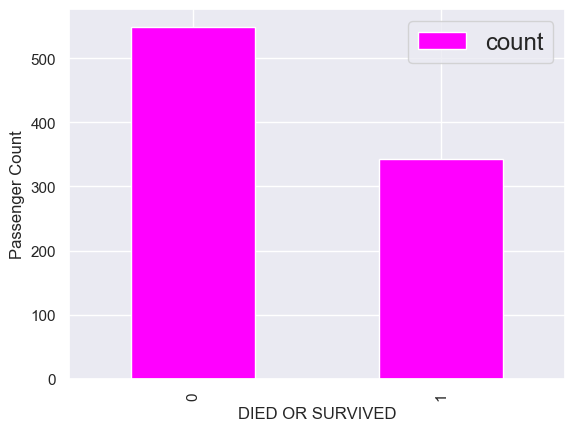

In [26]:
plt = Titanic_data.Survived.value_counts().plot(kind='bar',color="magenta")
plt.set_xlabel('DIED OR SURVIVED')
plt.set_ylabel('Passenger Count')
plt.legend(fontsize='x-large')

**Insights** 
- Only 342 Passengers Survived out of 891
- Majority Died which conveys there were less chances of Survival

--------------------------------------------------------------------------------------------------

4.2 **Which gender has more survival rate?**

In [27]:
#Titanic_data.groupby(['Survived', 'Sex']).count()["Age"]
Titanic_data.groupby(['Survived', 'Sex']).count()["Age"]

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Age, dtype: int64

<Axes: xlabel='Sex'>

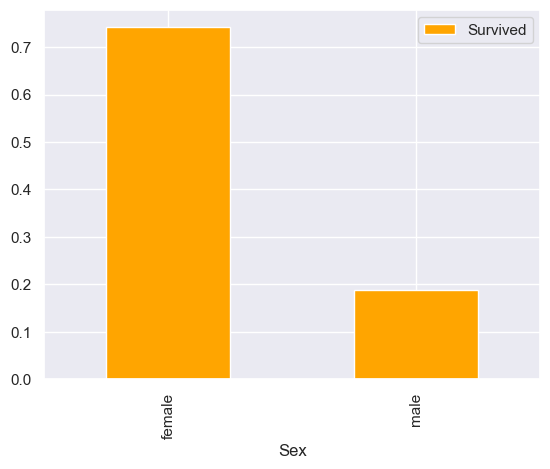

In [28]:
Titanic_data[['Sex','Survived']].groupby(['Sex']).mean().plot(kind='bar',color="Orange")

**Insights**

-  Female has better chances of Survival "LADIES FIRST"
-  There were more males as compared to females ,but most of them died.

4.3 **What is Survival rate based on Person type?**

In [29]:
Titanic_data.groupby(['Survived', 'Age_band']).count()['Sex']

Survived  Age_band
0         Adults      520
          Children     27
          Infant        2
1         Adults      300
          Children     30
          Infant       12
Name: Sex, dtype: int64

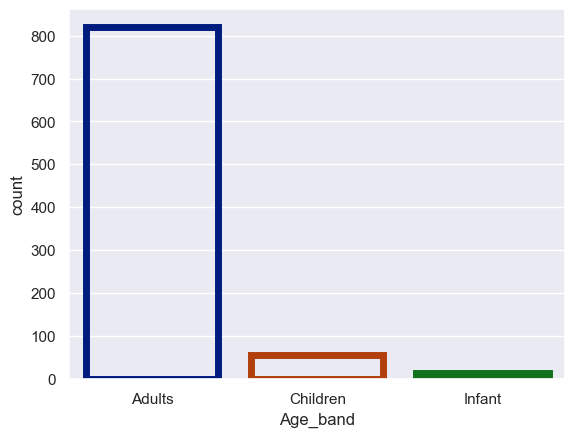

In [30]:
ax = sns.countplot(x="Age_band", data=Titanic_data,
                   facecolor=(0, 1, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))

## More number of Adult travellers as compared to children and Infant

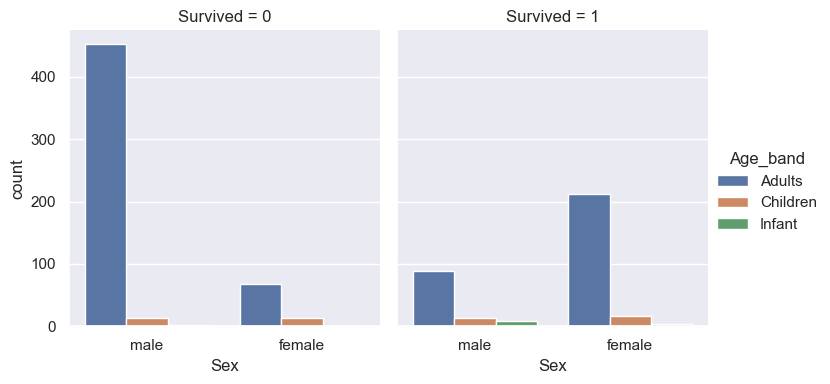

In [31]:
g = sns.catplot(x="Sex", hue="Age_band", col="Survived",
                data=Titanic_data, kind="count",
                height=4, aspect=.92);

(-0.325, 1.325, 0.0, 576.45)

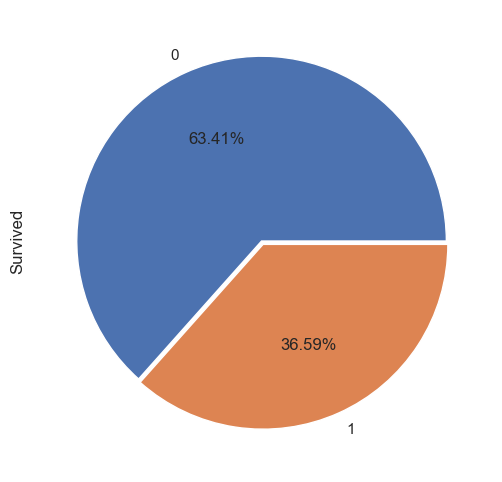

In [32]:
Titanic_data[Titanic_data['Age_band'] == 'Adults'].Survived.groupby(Titanic_data.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.02],autopct='%1.2f%%')
plt.axis('equal')
#plt.legend(["Died","Survived"])
#plt.set_title("Adult survival rate")
#plt.show()





(-0.325, 1.325, 0.0, 576.45)

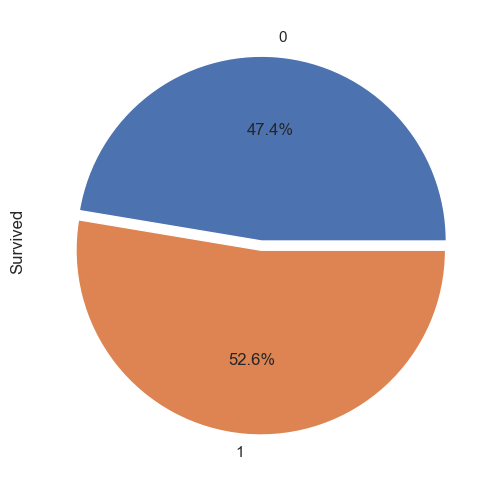

In [33]:
Titanic_data[Titanic_data['Age_band'] == 'Children'].Survived.groupby(Titanic_data.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
#plt.legend(["Died","Survived"])
#plt.set_title("Child survival rate")
#plt.show()

------------------------------------------**CHILD-SURVIVAL RATE**--------------------------------------------------------------

(-0.325, 1.325, 0.0, 576.45)

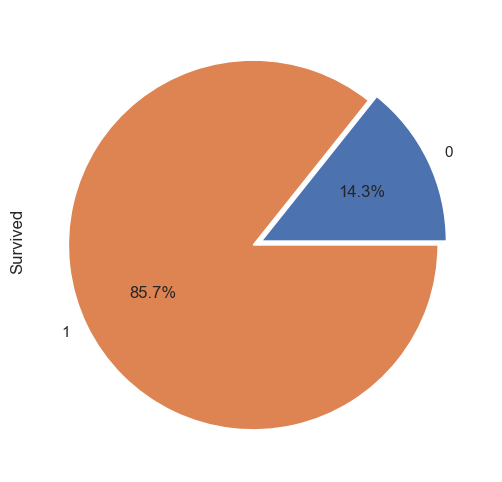

In [34]:
Titanic_data[Titanic_data['Age_band'] == 'Infant'].Survived.groupby(Titanic_data.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
#plt.legend(["Died","Survived"])
#plt.set_title("Infant survival rate")
#plt.show()

**Insights** 

- Majority Passengers  were  Adults

- Almost half of the total number of children survived.

- Most of the Adults failed to Survive

- More than 85percent of Infant Survived


4.4 **Did Economy Class had an impact on survival rate?**

In [35]:
Titanic_data.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

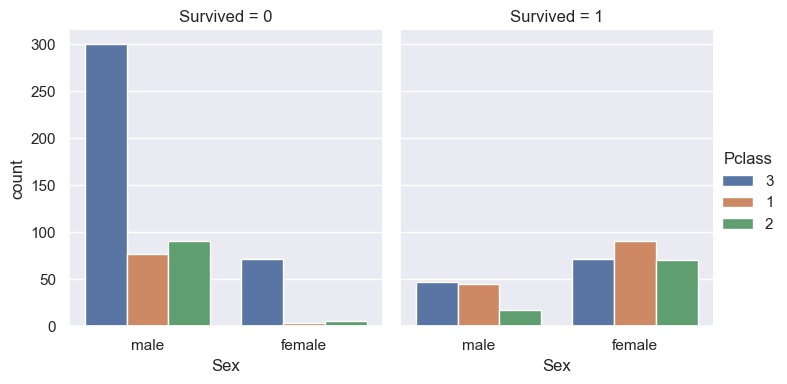

In [36]:
g = sns.catplot(x="Sex", hue="Pclass", col="Survived",
                data=Titanic_data, kind="count",
                height=4, aspect=.92);

**Insights**

- Most of the passengers travelled in Third class but only 24per of them survived

- If we talk about survival ,more passengers in First class survived and again female given more priority

- Economic Class affected Survival rate and Passengers travelling with First Class had higher ratio of survival as compared to Class 2 and 3.

4.5 **What is Survival Propability based on Embarkment of passengers?**

Titanic’s first voyage was to New York before sailing to the Atlantic Ocean it picked passengers from three ports Cherbourg(C), Queenstown(Q), Southampton(S). Most of the Passengers in Titanicic embarked from the port of Southampton.Lets see how embarkemt affected survival probability.

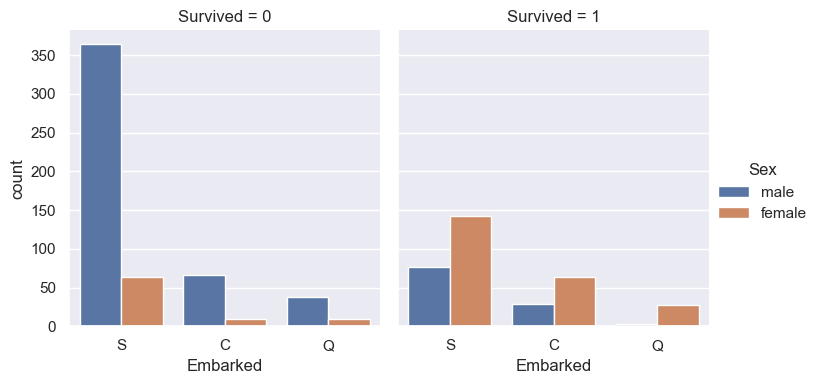

In [37]:
g = sns.catplot(x="Embarked", hue="Sex", col="Survived",
                data=Titanic_data, kind="count",
                height=4, aspect=.92);



4.6 **How is Fare distributed for  Passesngers?**

In [38]:
Titanic_data['Fare'].min()

0.0

In [39]:
Titanic_data['Fare'].max()

512.3292

In [40]:
Titanic_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

FareBand  Survived
0        H  0.581197
1        L  0.254005
2        M  0.431818

In [41]:
Titanic_data.groupby(['FareBand', 'Survived'])['Survived'].count()

FareBand  Survived
H         0            98
          1           136
L         0           326
          1           111
M         0           125
          1            95
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='Fare'>

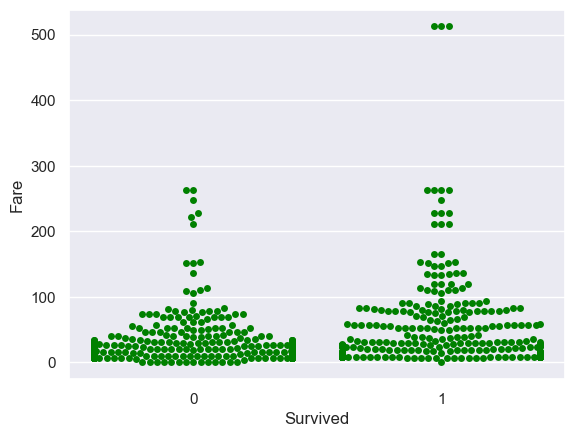

In [42]:
sns.swarmplot(x='Survived', y='Fare', data=Titanic_data,color="green") 

**Insights**

- Majority Passenger's fare lies in 0-100 dollars range
- Passengers who paid more Fares had more chances of Survival
- Fare as high as 514 dollars was purcharsed by very few.(Outlier)

4.7 **What was Average fare by Pclass & Embark location?**

<Axes: xlabel='Pclass', ylabel='Fare'>

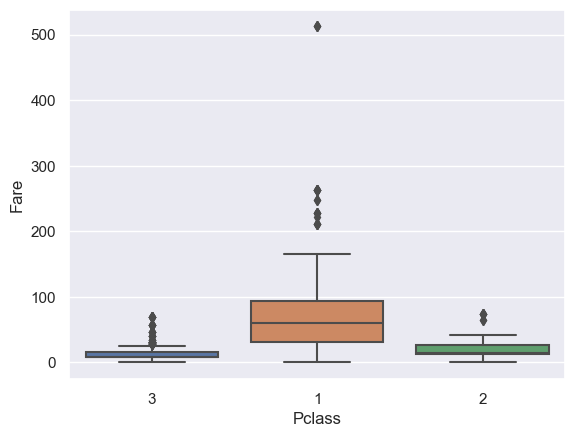

In [43]:
sns.boxplot(x="Pclass", y="Fare", data=Titanic_data)

**Insights**

- First Class Passengers paid major part of total Fare.
- Passengers who Embarked from Port C paid Highest Fare

4.8 **Segment Age in bins with size of 10**

Text(0.5, 0.5, 'Age Distribution of Titanic Passengers')

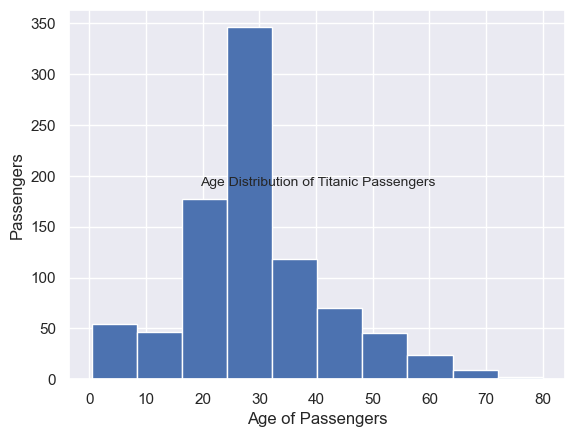

In [44]:
plt=Titanic_data['Age'].hist(bins=10)
plt.set_ylabel('Passengers')
plt.set_xlabel('Age of Passengers')
plt.set_title('Age Distribution of Titanic Passengers',size=10, y=.5)

Insights:
- The youngest passenger on the Titanic were toddlers under 6 months
- The oldest were of 80 years of age. 
- The mean for passengers was a bit over 29 years i.e there were more young passengers in the ship.

**Lets see how Age has correlation with Survival**

<Axes: xlabel='Age', ylabel='Density'>

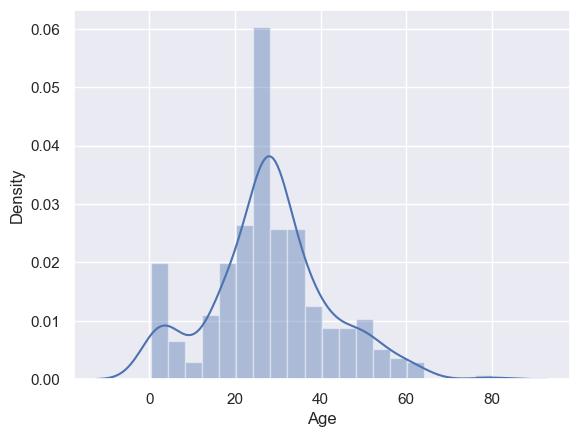

In [45]:

sns.distplot(Titanic_data[Titanic_data['Survived']==1]['Age'])

<Axes: xlabel='Age', ylabel='Density'>

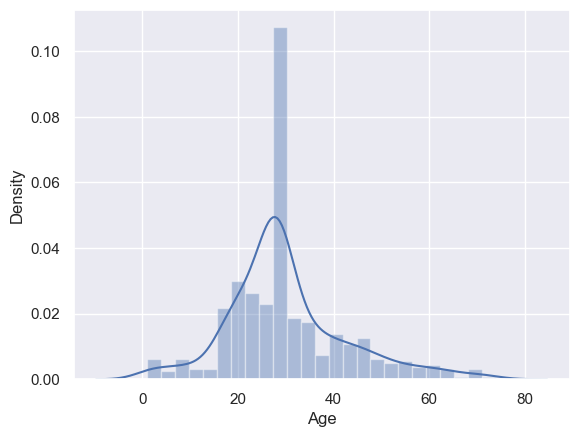

In [46]:
sns.distplot(Titanic_data[Titanic_data['Survived']==0]['Age'])

<Axes: xlabel='Sex', ylabel='Age'>

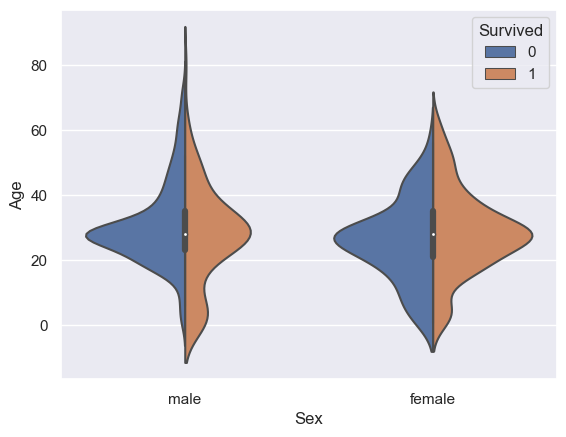

In [47]:
sns.violinplot(x='Sex',y='Age',hue='Survived',data=Titanic_data,split=True)

**Insights**
- Most of the passengers died.
- Majority of passengers were between 25-40,most of them died
- Female are more likely to survival 

4.9 **Did Solo Passenger has less chances of Survival ?**

In [48]:
Titanic_data 

Survived Pclass     Sex   Age  SibSp  Parch     Fare Embarked Age_band  \
0           0      3    male  22.0      1      0   7.2500        S   Adults   
1           1      1  female  38.0      1      0  71.2833        C   Adults   
2           1      3  female  26.0      0      0   7.9250        S   Adults   
3           1      1  female  35.0      1      0  53.1000        S   Adults   
4           0      3    male  35.0      0      0   8.0500        S   Adults   
..        ...    ...     ...   ...    ...    ...      ...      ...      ...   
886         0      2    male  27.0      0      0  13.0000        S   Adults   
887         1      1  female  19.0      0      0  30.0000        S   Adults   
888         0      3  female  28.0      1      2  23.4500        S   Adults   
889         1      1    male  26.0      0      0  30.0000        C   Adults   
890         0      3    male  32.0      0      0   7.7500        Q   Adults   

    FareBand  
0          L  
1          H  
2          L  
3          H  
4          L  
..       ...  
886        L  
887        M  
888        M  
889        M  
890        L  

[891 rows x 10 columns]

In [49]:
Titanic_data['FamilySize']=0
Titanic_data['FamilySize']=1+Titanic_data['Parch']+Titanic_data['SibSp']
Titanic_data['SoloPassenger']=0
Titanic_data.loc[Titanic_data.FamilySize==1,'SoloPassenger']=1

In [50]:
Titanic_data.head()

Survived Pclass     Sex   Age  SibSp  Parch     Fare Embarked Age_band  \
0         0      3    male  22.0      1      0   7.2500        S   Adults   
1         1      1  female  38.0      1      0  71.2833        C   Adults   
2         1      3  female  26.0      0      0   7.9250        S   Adults   
3         1      1  female  35.0      1      0  53.1000        S   Adults   
4         0      3    male  35.0      0      0   8.0500        S   Adults   

  FareBand  FamilySize  SoloPassenger  
0        L           2              0  
1        H           2              0  
2        L           1              1  
3        H           2              0  
4        L           1              1

**Insights**

- Most of the Passengers were travelling Solo and most of them died
- Solo Females were more likely to Survive as compared to males
- Passengers Class have a positive correlation with Solo Passenger Survival
- Passengers Embarked from Port Q had Fifty -Fifty  Chances of Survival 


4.10 **How did total family size affected Survival Count**?

In [51]:
for i in Titanic_data:
    Titanic_data['FamilySize'] = Titanic_data['SibSp'] + Titanic_data['Parch'] + 1

Titanic_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

FamilySize  Survived
3           4  0.724138
2           3  0.578431
1           2  0.552795
6           7  0.333333
0           1  0.303538
4           5  0.200000
5           6  0.136364
7           8  0.000000
8          11  0.000000

<Axes: xlabel='FamilySize', ylabel='Survived'>

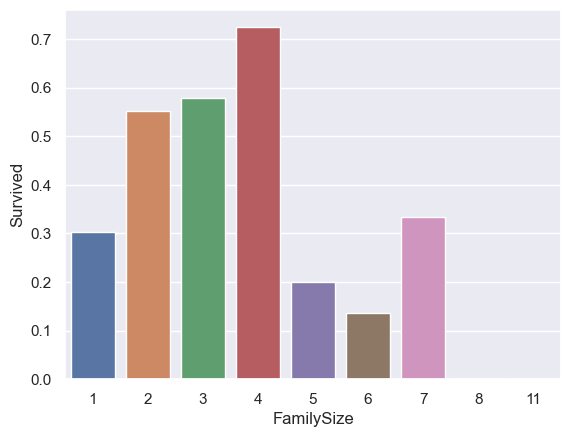

In [52]:
sns.barplot(x='FamilySize', y='Survived', data=Titanic_data,ci= None )

**Insights**
- Both men and women had a massive drop of survival with a FamilySize over 4. 
- The chance to survive as a man increased with FamilySize until a size of 4
- Men are not likely to Survive with FamilySize 5 and 6
- Big Size Family less likihood of Survival

**Insights**:

- Older women have higher rate of survival than older men . Also, older women has higher rate of survival than younger women; an opposite trend to the one for the male passengers.
- All the features are not necessary to predict Survival
- More Features creates Complexitity 
- Fare has positive Correlation
- For Females major Survival Chances , only for port C males had more likeihood of Survival.


# Conclusion : "If you were young female travelling in First Class and embarked from port -C then you had best chances of Survival in Titanic"

-  Most of the Passengers Died
- "Ladies & Children First" i.e **76% of Females and 16% of Children** Survived
-  Gender , Passenger type & Classs are mostly realted to Survival.
-  Survival rate diminishes significantly for Solo  Passengers
-  Majority of Male Died
-  Males with Family had better Survival rate as compared to Solo Males

******************************************************************************************************************************
## Part 2 Data Modelling 

### Data Modeling in Machine Learning

#### What is Data Modeling?

**Data Modeling** in machine learning refers to the process of using algorithms to find patterns in data and build models that can **predict**, **classify**, or **generate** outputs from new inputs.

It involves:
- Selecting a modeling technique (Regression, Classification, etc.)
- Training the model on historical data
- Evaluating and refining it for accurate predictions

- Data Modeling typically falls under **Supervised**, **Unsupervised**, or **Reinforcement Learning**, with most business cases using **Supervised Learning** (Classification/Regression).

### Types of Data Modeling

### 1. Regression
- **Goal**: Predict **continuous** numerical values.
- **Target Variable**: Continuous (e.g., price, temperature, income).
- **Example Use Cases**:
  - Predicting house prices
  - Estimating annual salary
  - Forecasting sales

### 2.Classification
- **Goal**: Predict **categorical** values.
- **Target Variable**: Categorical (e.g., Yes/No, 0/1, A/B/C).
- **Example Use Cases**:
  - Email Spam detection
  - Predicting if a customer will churn
  - Diagnosing disease (positive/negative)

### 3.Clustering (Unsupervised)
- **Goal**: Group similar items without labeled output.
- **Example Use Cases**:
  - Customer segmentation
  - Document grouping
  - Anomaly detection


### Logistic Regression 
- is a supervised machine learning algorithm used for classification problems.
- It estimates the probability that a given input point belongs to a particular category.
### Binary Logistic Regression
Used when the dependent variable (Y) has two classes (e.g., Survived: 0 or 1)
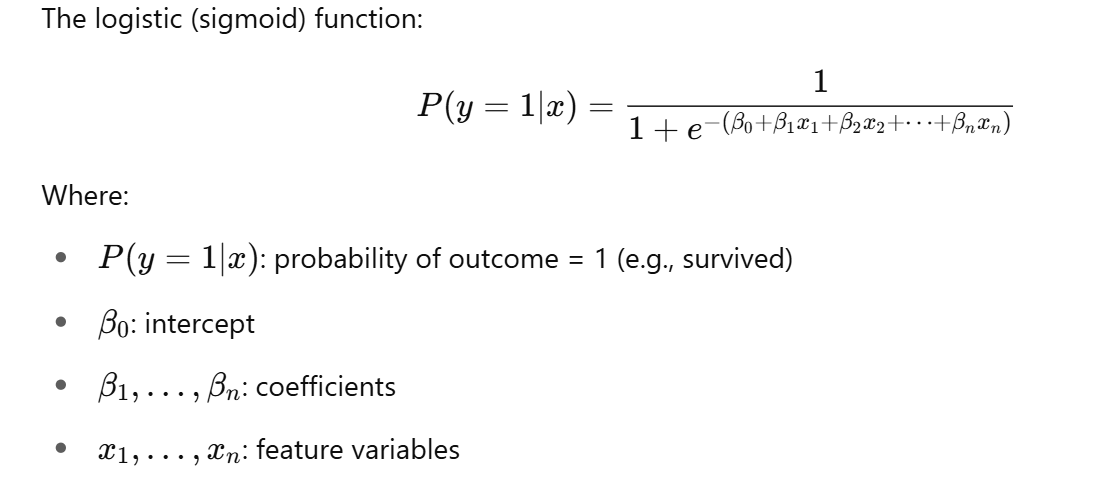

### Sigmoid Curve (Graph)
A logistic regression model outputs probabilities between 0 and 1, shaped like an S-curve (sigmoid):

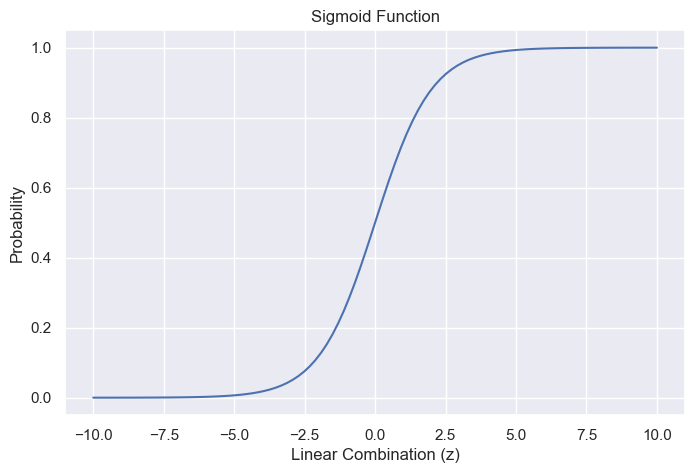

In [54]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))

plt.figure(figsize=(8,5))
plt.plot(z, sigmoid)
plt.title("Sigmoid Function")
plt.xlabel("Linear Combination (z)")
plt.ylabel("Probability")
plt.grid(True)
plt.show()


### Binary Classification Decision Rule

- If \( P(y=1|x) > 0.5 \), predict class 1
- Else, predict class 0

This threshold can be tuned depending on the problem (e.g., 0.7 or 0.3).

### Multiclass Logistic Regression

Used when the target variable has **3 or more categories** (e.g., Cat, Dog, Rabbit).

### Softmax Function:

\[
P(y = k | x) = \frac{e^{\beta_k^T x}}{\sum_{j=1}^{K} e^{\beta_j^T x}}
\]

Where:
- \( K \): Total number of classes
- \( \beta_k \): Coefficients for class \( k \)
- Output: Probabilities for all classes (summing to 1)
###  Binary vs Multiclass Logistic Regression: Comparison

| Feature                  | Binary Logistic Regression | Multiclass Logistic Regression |
|--------------------------|----------------------------|--------------------------------|
| Target Classes           | 2 (e.g., Yes/No)           | 3 or more (e.g., A, B, C)      |
| Activation Function      | Sigmoid                    | Softmax                        |
| Output                   | One probability            | Probabilities for all classes  |
| Model Strategy           | One model                  | One-vs-Rest / Softmax          |
| Example                  | Survived (Yes/No)          | Animal Type (Cat, Dog, Rabbit) |

### Agenda:  Predict the Survial in Titanic Data using Binary Logistic Regression

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [56]:
Titanic_data

Survived Pclass     Sex   Age  SibSp  Parch     Fare Embarked Age_band  \
0           0      3    male  22.0      1      0   7.2500        S   Adults   
1           1      1  female  38.0      1      0  71.2833        C   Adults   
2           1      3  female  26.0      0      0   7.9250        S   Adults   
3           1      1  female  35.0      1      0  53.1000        S   Adults   
4           0      3    male  35.0      0      0   8.0500        S   Adults   
..        ...    ...     ...   ...    ...    ...      ...      ...      ...   
886         0      2    male  27.0      0      0  13.0000        S   Adults   
887         1      1  female  19.0      0      0  30.0000        S   Adults   
888         0      3  female  28.0      1      2  23.4500        S   Adults   
889         1      1    male  26.0      0      0  30.0000        C   Adults   
890         0      3    male  32.0      0      0   7.7500        Q   Adults   

    FareBand  FamilySize  SoloPassenger  
0          L           2              0  
1          H           2              0  
2          L           1              1  
3          H           2              0  
4          L           1              1  
..       ...         ...            ...  
886        L           1              1  
887        M           1              1  
888        M           4              0  
889        M           1              1  
890        L           1              1  

[891 rows x 12 columns]

In [57]:
## Encode Categorical Features
le = LabelEncoder()
Titanic_data['Sex'] = le.fit_transform(Titanic_data['Sex'])
Titanic_data['Embarked'] = le.fit_transform(Titanic_data['Embarked'])
Titanic_data['Age_band'] = le.fit_transform(Titanic_data['Age_band'])
Titanic_data['FareBand'] = le.fit_transform(Titanic_data['FareBand'])


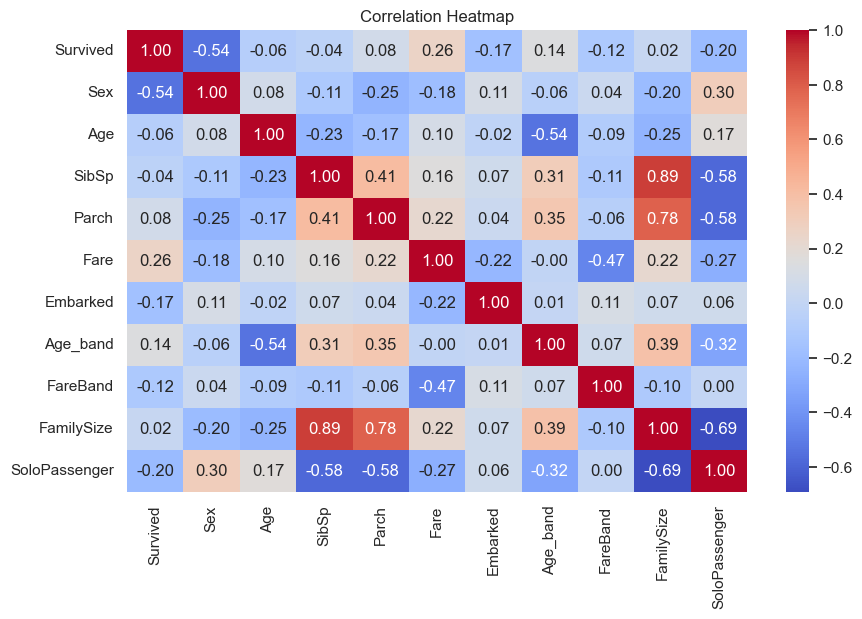

In [60]:
plt.figure(figsize=(10, 6))
sns.heatmap(Titanic_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [61]:
Titanic_data

Survived Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Age_band  \
0           0      3    1  22.0      1      0   7.2500         2         0   
1           1      1    0  38.0      1      0  71.2833         0         0   
2           1      3    0  26.0      0      0   7.9250         2         0   
3           1      1    0  35.0      1      0  53.1000         2         0   
4           0      3    1  35.0      0      0   8.0500         2         0   
..        ...    ...  ...   ...    ...    ...      ...       ...       ...   
886         0      2    1  27.0      0      0  13.0000         2         0   
887         1      1    0  19.0      0      0  30.0000         2         0   
888         0      3    0  28.0      1      2  23.4500         2         0   
889         1      1    1  26.0      0      0  30.0000         0         0   
890         0      3    1  32.0      0      0   7.7500         1         0   

     FareBand  FamilySize  SoloPassenger  
0           1           2              0  
1           0           2              0  
2           1           1              1  
3           0           2              0  
4           1           1              1  
..        ...         ...            ...  
886         1           1              1  
887         2           1              1  
888         2           4              0  
889         2           1              1  
890         1           1              1  

[891 rows x 12 columns]

In [62]:
X = Titanic_data.drop(['Survived','SibSp','Parch','SoloPassenger'], axis=1)
y = Titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [63]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

## Confusion Matrix 



##  What is a Confusion Matrix?

A **Confusion Matrix** is a performance evaluation metric for classification problems.
It shows the **actual vs predicted** classifications and helps us understand the types of errors the model is making.

###  Format of a Confusion Matrix (for Binary Classification):

|               | **Predicted: 0**    | **Predicted: 1**    |
| ------------- | ------------------- | ------------------- |
| **Actual: 0** | True Negative (TN)  | False Positive (FP) |
| **Actual: 1** | False Negative (FN) | True Positive (TP)  |

---

##  Confusion Matrix Terminology

* **True Positive (TP)**: Model predicted **1**, and the actual was also **1** (Survived and predicted as Survived).
* **True Negative (TN)**: Model predicted **0**, and the actual was also **0** (Not survived and predicted as Not survived).
* **False Positive (FP)**: Model predicted **1**, but the actual was **0** (Not survived but predicted as Survived).
* **False Negative (FN)**: Model predicted **0**, but the actual was **1** (Survived but predicted as Not survived).

---

##  Example

Suppose you have the following actual and predicted values for 10 passengers:

| Passenger | Actual | Predicted |
| --------- | ------ | --------- |
| 1         | 1      | 1         |
| 2         | 0      | 0         |
| 3         | 1      | 0         |
| 4         | 0      | 0         |
| 5         | 1      | 1         |
| 6         | 1      | 0         |
| 7         | 0      | 1         |
| 8         | 1      | 1         |
| 9         | 0      | 0         |
| 10        | 0      | 1         |

### Confusion Matrix from the above:

|               | Predicted: 0 | Predicted: 1 |
| ------------- | ------------ | ------------ |
| **Actual: 0** | 3 (TN)       | 2 (FP)       |
| **Actual: 1** | 2 (FN)       | 3 (TP)       |

---

## Performance Metrics from Confusion Matrix:

You can calculate various metrics using the confusion matrix:

* **Accuracy** = (TP + TN) / Total
  \= (3 + 3) / 10 = 60%

* **Precision** = TP / (TP + FP)
  \= 3 / (3 + 2) = 0.60

* **Recall (Sensitivity)** = TP / (TP + FN)
  \= 3 / (3 + 2) = 0.60

* **F1-Score** = 2 × (Precision × Recall) / (Precision + Recall)




In [66]:
(135+79)/(135+79+22+32)

0.7985074626865671

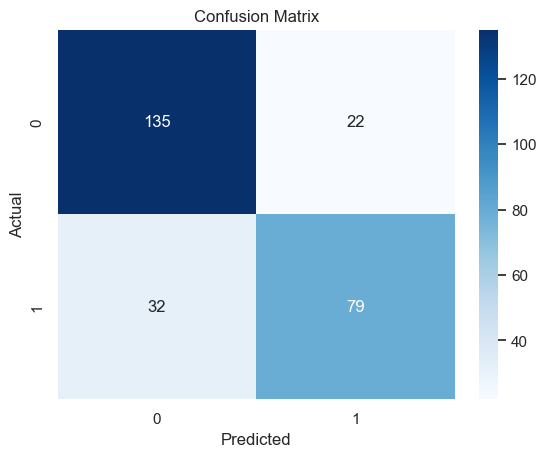

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       157
           1       0.78      0.71      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [64]:
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


In [ ]:
## Accuracy = 
(135+79) / (135+22+32+79)

### Conclusion

- 80% we will be able to predict correct survival rate 
